# First step


In [ ]:
# Import general libraries for data analysis
%matplotlib inline
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read file
def read_file(filename):
  # Read file csv
  data = pd.read_csv(filename, index_col=0)
  return data;

data = read_file('AppleStore.csv')
data.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


# First task

In [ ]:
print('Rows (observations): ', data.shape[0])
print('Cols (variables): ', data.shape[1])

Rows (observations):  7197
Cols (variables):  16


In [ ]:
print('Number of NULL values in the cols: ')
data.isnull().sum()

Number of NULL values in the cols: 


id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [ ]:
print('Number of None values in the cols: ')
data.isna().sum()

Number of None values in the cols: 


id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [ ]:
print('Other info: ')
data.info()

Other info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 1 to 11097
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(8), obj

# Second task

## Frequency data analysis

For frequency data analysis categorical variables are used.

In [ ]:
categorical_cols = [
    'currency',
    'user_rating',
    'user_rating_ver',
    'cont_rating',
    'prime_genre',
    'vpp_lic',
    'ver'
]

for col_name in categorical_cols:
    print('Frequency for ' + col_name)
    print(data[col_name].value_counts())
    print()

Frequency for currency
USD    7197
Name: currency, dtype: int64

Frequency for user_rating
4.5    2663
4.0    1626
0.0     929
3.5     702
5.0     492
3.0     383
2.5     196
2.0     106
1.5      56
1.0      44
Name: user_rating, dtype: int64

Frequency for user_rating_ver
4.5    2205
0.0    1443
4.0    1237
5.0     964
3.5     533
3.0     304
2.5     176
2.0     136
1.0     125
1.5      74
Name: user_rating_ver, dtype: int64

Frequency for cont_rating
4+     4433
12+    1155
9+      987
17+     622
Name: cont_rating, dtype: int64

Frequency for prime_genre
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather             

## Central tendency

For central tendency estimation we will use mode, median and mean. (depending on the type of the scale)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 1 to 11097
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory

In [ ]:
nominal_cols = [
    'currency',
    'prime_genre',
    'ver'
]

ordinal_cols = [
    'user_rating',
    'user_rating_ver',
    'cont_rating',
    'vpp_lic'
]
# prepare cont_rating col for data analysis (
#   4+ = 1
#   9+ = 2
#   12+ = 3
#   17+ = 4
# )
data['cont_rating'] = data['cont_rating'].replace('4+', 1)
data['cont_rating'] = data['cont_rating'].replace('9+', 2)
data['cont_rating'] = data['cont_rating'].replace('12+', 3)
data['cont_rating'] = data['cont_rating'].replace('17+', 4)

scale_cols = [
    'size_bytes',
    'price',
    'rating_count_tot',
    'rating_count_ver',
    'sup_devices.num',
    'ipadSc_urls.num',
    'lang.num'
]

In [ ]:
def getMode(cols):
    for col_name in cols:
        print('Mode for ' + col_name)
        print(data[col_name].mode())
        print()

def getMedian(cols):
    for col_name in cols:
        print('Median for ' + col_name)
        print(data[col_name].median())
        print()

def getMean(cols):
    for col_name in cols:
        print('Mean for ' + col_name)
        print(data[col_name].mean())
        print()

# Mode for data set (for all types of cols)
getMode(nominal_cols)
getMode(ordinal_cols)
getMode(scale_cols)

# Median for data set (for ordinal and scale vars)
getMedian(ordinal_cols)
getMedian(scale_cols)

# Mean for data set (for scale vars)
getMean(scale_cols)

Mode for currency
0    USD
dtype: object

Mode for prime_genre
0    Games
dtype: object

Mode for ver
0    1.0
dtype: object

Mode for user_rating
0    4.5
dtype: float64

Mode for user_rating_ver
0    4.5
dtype: float64

Mode for cont_rating
0    1
dtype: int64

Mode for vpp_lic
0    1
dtype: int64

Mode for size_bytes
0    31624192
dtype: int64

Mode for price
0    0.0
dtype: float64

Mode for rating_count_tot
0    0
dtype: int64

Mode for rating_count_ver
0    0
dtype: int64

Mode for sup_devices.num
0    37
dtype: int64

Mode for ipadSc_urls.num
0    5
dtype: int64

Mode for lang.num
0    1
dtype: int64

Median for user_rating
4.0

Median for user_rating_ver
4.0

Median for cont_rating
1.0

Median for vpp_lic
1.0

Median for size_bytes
97153024.0

Median for price
0.0

Median for rating_count_tot
300.0

Median for rating_count_ver
23.0

Median for sup_devices.num
37.0

Median for ipadSc_urls.num
5.0

Median for lang.num
1.0

Mean for size_bytes
199134453.825066

Mean for price
1.72

## Dispersion measures

We will calculate dispersion using both range and standard deviation.

In [ ]:
def CalculateDispertion(col_name):
    print('--- ' + 'Dispersion measures for ' + col_name + ' ---')
    print('Range: ' + str(data[col_name].max() - data[col_name].min())) 
    print('Standart deviation: ' + str(data[col_name].std()))
    print()

for col in scale_cols:
    CalculateDispertion(col)

--- Dispersion measures for size_bytes ---
Range: 4025379840
Standart deviation: 359206913.5387034

--- Dispersion measures for price ---
Range: 299.99
Standart deviation: 5.833005786952138

--- Dispersion measures for rating_count_tot ---
Range: 2974676
Standart deviation: 75739.40867472359

--- Dispersion measures for rating_count_ver ---
Range: 177050
Standart deviation: 3920.455183361927

--- Dispersion measures for sup_devices.num ---
Range: 38
Standart deviation: 3.7377152388586308

--- Dispersion measures for ipadSc_urls.num ---
Range: 5
Standart deviation: 1.9860046449597086

--- Dispersion measures for lang.num ---
Range: 75
Standart deviation: 7.919592722881806



## Variables’ distribution characteristics

In [ ]:
ordinal_cols
scale_cols

# If median is used to describe central tendency, we should calculate interquartile range or quartile deviation
# If mean is used to describe central tendency, we should calculate standard deviation or the variance

def CalculateRangeAndQuartileDeviation(col_name):
    q25 = data[col_name].quantile(q=0.25)
    q75 = data[col_name].quantile(q=0.75)
    iqr = q75 - q25

    print('Interquartile range: ' + str(iqr))
    print('Quartile deviation: ' + str(iqr/2))
    print()

def CalculateStandardDeviationAndVariance(col_name):
    print('Range: ' + str(data[col_name].max() - data[col_name].min())) 
    print('Standart deviation: ' + str(data[col_name].std()))
    print()

# Median is used to describe central tendency for ordinal variables
for col in ordinal_cols:
    print('--- ' + col + ' '' distribution characteristics ---')
    CalculateRangeAndQuartileDeviation(col)

# Median or mean can be used to describe central tendency for scale variables. 
# We should calculate the difference between mean and median. If there are closed to each other,
# mean is used to describe the central tendency. Otherwise, median is used to descrive the central
# tendency.
for col in scale_cols:
    print('--- ' + col + ' '' distribution characteristics ---')
    median = data[col].median()
    mean = data[col].mean()

    if abs(median - mean) <= 0.5:
        CalculateStandardDeviationAndVariance(col)
    else:
        CalculateRangeAndQuartileDeviation(col)


--- user_rating  distribution characteristics ---
Interquartile range: 1.0
Quartile deviation: 0.5

--- user_rating_ver  distribution characteristics ---
Interquartile range: 2.0
Quartile deviation: 1.0

--- cont_rating  distribution characteristics ---
Interquartile range: 1.0
Quartile deviation: 0.5

--- vpp_lic  distribution characteristics ---
Interquartile range: 0.0
Quartile deviation: 0.0

--- size_bytes  distribution characteristics ---
Interquartile range: 135002112.0
Quartile deviation: 67501056.0

--- price  distribution characteristics ---
Interquartile range: 1.99
Quartile deviation: 0.995

--- rating_count_tot  distribution characteristics ---
Interquartile range: 2765.0
Quartile deviation: 1382.5

--- rating_count_ver  distribution characteristics ---
Interquartile range: 139.0
Quartile deviation: 69.5

--- sup_devices.num  distribution characteristics ---
Range: 38
Standart deviation: 3.7377152388586308

--- ipadSc_urls.num  distribution characteristics ---
Interquartil

## Graphical data analysis

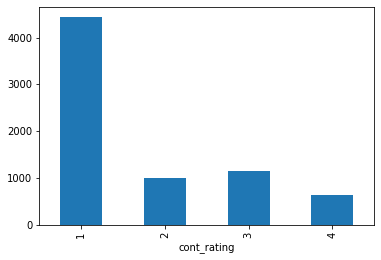

In [ ]:
#"currency": Currency Type
#"user_rating" : Average User Rating value (for all version)
#"userratingver": Average User Rating value (for current version)
#"ver" : Latest version code
#"cont_rating": Content Rating
#"prime_genre": Primary Genre
#"vpp_lic": Vpp Device Based Licensing Enabled

categorical_cols = [
    'user_rating',
    'user_rating_ver',
    'cont_rating',
    'prime_genre',
    'vpp_lic',
    'ver'
]

# 1 = 4+
# 2 = 9+
# 3 = 12+
# 4 = 17+
data.groupby(data['cont_rating']).size().plot(kind='bar')


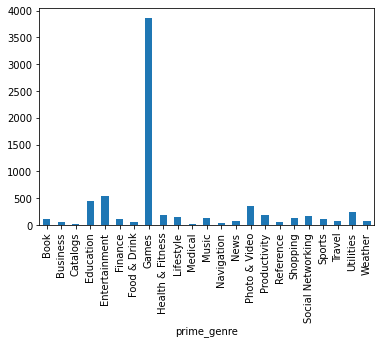

In [ ]:
data.groupby(data['prime_genre']).size().plot(kind='bar')

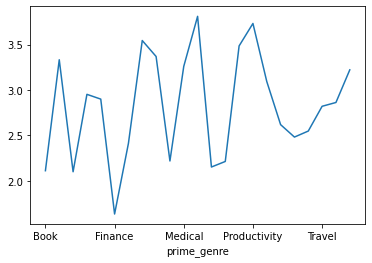

In [ ]:
data.groupby(data['prime_genre']).mean()['user_rating_ver'].plot()

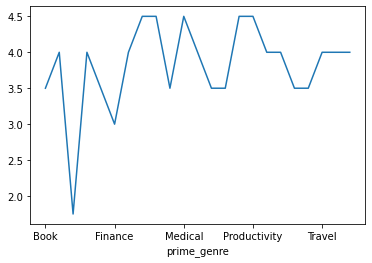

In [ ]:
data.groupby(data['prime_genre']).median()['user_rating'].plot()

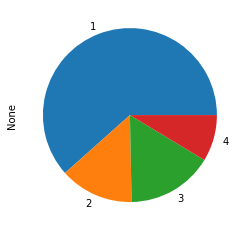

In [ ]:
data.groupby(data['cont_rating']).size().plot(kind='pie')

As we can see, the most popular content rating is "4+", the highest average rating is for the "Medical" genre, "Games" genre is the most widespread.

## Pivot tables

In [ ]:
data.pivot_table(index=['prime_genre'])

,cont_rating,id,ipadSc_urls.num,lang.num,price,rating_count_tot,rating_count_ver,size_bytes,sup_devices.num,user_rating,user_rating_ver,vpp_lic
prime_genre,,,,,,,,,,,,
Book,1.937500,9.435737e+08,2.991071,2.375000,1.790536,5125.437500,70.714286,1.788206e+08,37.544643,2.477679,2.111607,1.000000
Business,1.140351,6.934696e+08,3.368421,10.684211,5.116316,4788.087719,275.456140,6.416849e+07,36.122807,3.745614,3.333333,1.000000
Catalogs,1.900000,9.521081e+08,3.400000,2.400000,0.799000,1732.500000,344.600000,5.018163e+07,37.300000,2.100000,2.100000,1.000000
Education,1.094923,8.169410e+08,4.421634,7.205298,4.028234,2239.229581,239.000000,1.804242e+08,36.675497,3.376380,2.952539,1.000000
Entertainment,2.035514,8.507593e+08,3.050467,4.528972,0.889701,7533.678505,140.893458,1.014787e+08,36.671028,3.246729,2.900000,0.998131
Finance,1.788462,7.232960e+08,1.721154,2.250000,0.421154,11047.653846,250.576923,7.823586e+07,36.836538,2.432692,1.634615,1.000000
Food & Drink,1.730159,7.313079e+08,2.063492,3.571429,1.552381,13938.619048,320.603175,7.759500e+07,36.920635,3.182540,2.412698,1.000000
Games,1.745210,9.351898e+08,4.298032,4.587778,1.432923,13691.996634,575.280166,2.836583e+08,38.018384,3.685008,3.545184,0.991455
Health & Fitness,1.488889,7.313714e+08,2.450000,6.661111,1.916444,9913.172222,211.205556,9.010664e+07,35.888889,3.700000,3.369444,1.000000


In [ ]:
data.pivot_table(index=['cont_rating'])

,id,ipadSc_urls.num,lang.num,price,rating_count_tot,rating_count_ver,size_bytes,sup_devices.num,user_rating,user_rating_ver,vpp_lic
cont_rating,,,,,,,,,,,
1,8.490603e+08,3.747124,5.949470,1.777201,11939.485901,466.958268,1.408221e+08,37.278818,3.570156,3.314798,0.996391
2,9.341961e+08,4.205674,4.437690,2.153506,13722.158055,301.137791,3.436112e+08,37.280648,3.769504,3.656028,0.992908
3,8.719939e+08,3.780087,4.632900,1.566667,17539.424242,582.045887,3.111782e+08,37.896104,3.566667,3.267100,0.980087
4,8.341879e+08,2.495177,4.839228,0.981109,9743.901929,440.191318,1.774134e+08,37.090032,2.760450,2.153537,0.993569


# Third task

## Which primary genres are more and less popular?

As we can see from the histogram created earlier and, more strictly, from the frequency analysis, top-3 primary genres are: Games (3862), Entertainment (535),
Education (453) and the least popular 3 genres are: Navigation (46), Medical (23), Catalogs (10).

## How do you visualize price distribution of paid apps, please, descripe the shape of it?

Since are rather discrete (with step 1), we can use bar chart to visualize the price distribution of paid apps. As we can see from the graph, the distribution is positively skewed (the frequent scores are clusterd at the lower end and the tail points towards the higher or more positive scores).

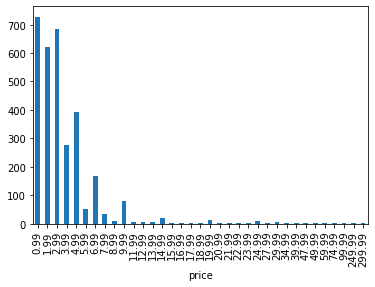

In [ ]:
data.groupby(data[data['price'] > 0]['price']).size().plot(kind='bar')

## How does the price distribution get affected by category?

Let's create bar charts with mean price for each category (among all apps and among paid apps). As we can see, the priciest category is "Medical" and the cheapest category is "Shopping".

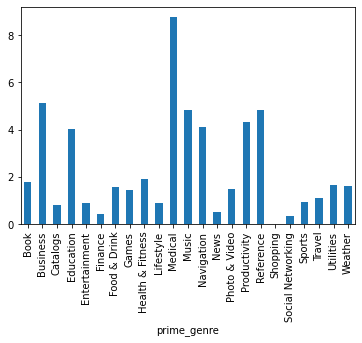

In [ ]:
data.groupby('prime_genre')['price'].mean().plot(kind='bar')

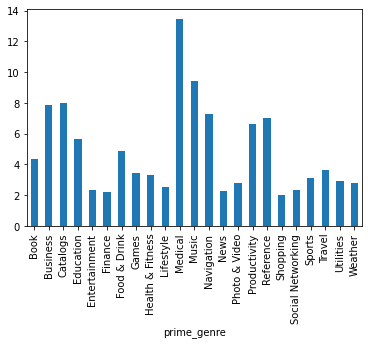

In [ ]:
data[data['price']>0].groupby('prime_genre')['price'].mean().plot(kind='bar')

## As the size of the app increases do they get pricier?


As we can see from the scatter plot, apps do not get pricier as the size increases.

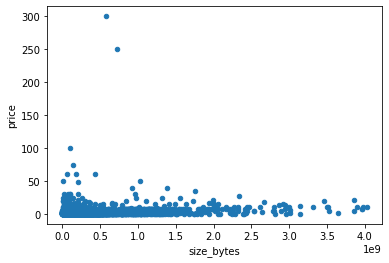

In [ ]:
data.plot(x='size_bytes',y='price', kind='scatter')

## How are the apps distributed category wise? 

Most apps are in the category "Games".

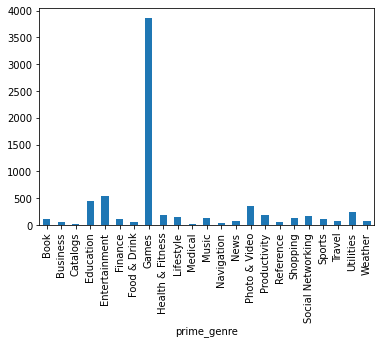

In [ ]:
data.groupby(data['prime_genre']).size().plot(kind='bar')

##  Find the most popular genres in each content rating group.

We calculate frequency of each genre in each content rating group. As can be seen from the table below, most popular genres for groups are:<br>
4+: Games (2079), Education (432), Entertainment (285), Photo & Video (285).<br>
9+: Games (865), Entertainment (44), Photo & Video (14).<br>
12+: Games (741), Entertainment (108), Social Networking (36).<br>
17+: Games (177), Entertainment (98), Social Networking (71).


In [ ]:
pd.options.display.max_rows = 1000
print(data.groupby('cont_rating')['prime_genre'].value_counts())

cont_rating  prime_genre      
1            Games                2079
             Education             432
             Entertainment         285
             Photo & Video         285
             Utilities             170
             Productivity          158
             Health & Fitness      141
             Music                 102
             Lifestyle              88
             Shopping               82
             Sports                 76
             Finance                75
             Weather                66
             Book                   63
             Travel                 63
             Social Networking      57
             Business               54
             Food & Drink           44
             Reference              44
             Navigation             40
             News                   18
             Catalogs                6
             Medical                 5
2            Games                 865
             Entertainment       

## Describe the main characteristics of the apps with the biggest size.

Mean price of biggest by size apps is nearly 3 time higher than mean price of all apps. Rating is a bit higher.

In [ ]:
print("Mean price of biggest (by size) apps (top 10%): "+ str(data.nlargest(int(len(data)*(10/100)), 'size_bytes')['price'].mean()))
print("Mean price of all apps: "+ str(data['price'].mean()))
print()
print("Mean user rating of biggest (by size) apps (top 10%): "+ str(data.nlargest(int(len(data)*(10/100)), 'size_bytes')['user_rating'].mean()))
print("Mean user rating of all apps: "+ str(data['user_rating'].mean()))

Mean price of biggest (by size) apps (top 10%): 5.049958275382411
Mean price of all apps: 1.7262178685562626

Mean user rating of biggest (by size) apps (top 10%): 3.799026425591099
Mean user rating of all apps: 3.526955675976101


## Compare the characteristics of free and non-free apps.

Mean size of non-free apps is neary 2 times larger than of free apps. Mean rating of non-free apps is a bit larger.

In [ ]:
print("Mean size of non-free apps " + str(data[data['price'] > 0]['size_bytes'].mean()))
print("Mean size of free apps " + str(data[data['price'] == 0]['size_bytes'].mean()))
print()
print("Mean user rating of non-free apps " + str(data[data['price'] > 0]['user_rating'].mean()))
print("Mean user rating of free apps " + str(data[data['price'] == 0]['user_rating'].mean()))


Mean size of non-free apps 265247839.58198026
Mean size of free apps 147935700.21005917

Mean user rating of non-free apps 3.720948742438714
Mean user rating of free apps 3.3767258382642997
